In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
nasa_asteroids_data = pd.read_csv('/kaggle/input/nasa-asteroids-classification/nasa.csv')
df = nasa_asteroids_data.copy()

In [48]:
df.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [49]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [50]:
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## 1. Clean column names

In [51]:
# Clean column names
df.columns = df.columns.str.lower()

In [52]:
df.columns = df.columns.str.replace('\s','_', regex=True )

In [53]:
df.columns

Index(['neo_reference_id', 'name', 'absolute_magnitude', 'est_dia_in_km(min)',
       'est_dia_in_km(max)', 'est_dia_in_m(min)', 'est_dia_in_m(max)',
       'est_dia_in_miles(min)', 'est_dia_in_miles(max)',
       'est_dia_in_feet(min)', 'est_dia_in_feet(max)', 'close_approach_date',
       'epoch_date_close_approach', 'relative_velocity_km_per_sec',
       'relative_velocity_km_per_hr', 'miles_per_hour',
       'miss_dist.(astronomical)', 'miss_dist.(lunar)',
       'miss_dist.(kilometers)', 'miss_dist.(miles)', 'orbiting_body',
       'orbit_id', 'orbit_determination_date', 'orbit_uncertainity',
       'minimum_orbit_intersection', 'jupiter_tisserand_invariant',
       'epoch_osculation', 'eccentricity', 'semi_major_axis', 'inclination',
       'asc_node_longitude', 'orbital_period', 'perihelion_distance',
       'perihelion_arg', 'aphelion_dist', 'perihelion_time', 'mean_anomaly',
       'mean_motion', 'equinox', 'hazardous'],
      dtype='object')

## 2. Find number of uniques in the columns and drop unnecessary columns

In [54]:
unique_values  = {}

for col in df.columns:
    unique_values[col] = df[col].nunique()

unique_values = pd.DataFrame(unique_values, index = ['Num_unique'])
unique_values

,neo_reference_id,name,absolute_magnitude,est_dia_in_km(min),est_dia_in_km(max),est_dia_in_m(min),est_dia_in_m(max),est_dia_in_miles(min),est_dia_in_miles(max),est_dia_in_feet(min),est_dia_in_feet(max),close_approach_date,epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist.(astronomical),miss_dist.(lunar),miss_dist.(kilometers),miss_dist.(miles),orbiting_body,orbit_id,orbit_determination_date,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,equinox,hazardous
Num_unique,3692,3692,269,269,269,269,269,269,269,269,269,777,777,4687,4687,4687,4673,4660,4661,4660,1,188,2680,10,3678,2495,429,3692,3692,3692,3692,3692,3692,3692,3692,3692,3692,3692,1,2


In [55]:
# drop unnecessary columns 
unnecessary_columns = ['neo_reference_id', 'name', 'close_approach_date',
                      'orbiting_body', 'orbit_determination_date', 'equinox']

In [56]:
df = df.drop(columns = unnecessary_columns, axis = 1)

In [57]:
df.head()

,absolute_magnitude,est_dia_in_km(min),est_dia_in_km(max),est_dia_in_m(min),est_dia_in_m(max),est_dia_in_miles(min),est_dia_in_miles(max),est_dia_in_feet(min),est_dia_in_feet(max),epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist.(astronomical),miss_dist.(lunar),miss_dist.(kilometers),miss_dist.(miles),orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,True
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,False
2,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,True
3,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,False
4,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,True


In [44]:
df.shape

(4687, 34)

In [60]:
# convert hazardous to 1/0 numeric column
df['hazardous'] = df['hazardous'].astype(int)

In [61]:
df.head(2)

,absolute_magnitude,est_dia_in_km(min),est_dia_in_km(max),est_dia_in_m(min),est_dia_in_m(max),est_dia_in_miles(min),est_dia_in_miles(max),est_dia_in_feet(min),est_dia_in_feet(max),epoch_date_close_approach,relative_velocity_km_per_sec,relative_velocity_km_per_hr,miles_per_hour,miss_dist.(astronomical),miss_dist.(lunar),miss_dist.(kilometers),miss_dist.(miles),orbit_id,orbit_uncertainity,minimum_orbit_intersection,jupiter_tisserand_invariant,epoch_osculation,eccentricity,semi_major_axis,inclination,asc_node_longitude,orbital_period,perihelion_distance,perihelion_arg,aphelion_dist,perihelion_time,mean_anomaly,mean_motion,hazardous
0,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,1
1,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,0


## 3. Check multicollinearity between numerical variables

In [62]:
# Correlationn between variables
# Compute correlation only for numerical columns
corr = df.corr(numeric_only=True, method='pearson')

In [65]:
sorted_cols = corr.abs().sum().sort_values(ascending=False).index
corr_sorted = corr.loc[sorted_cols, sorted_cols]

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


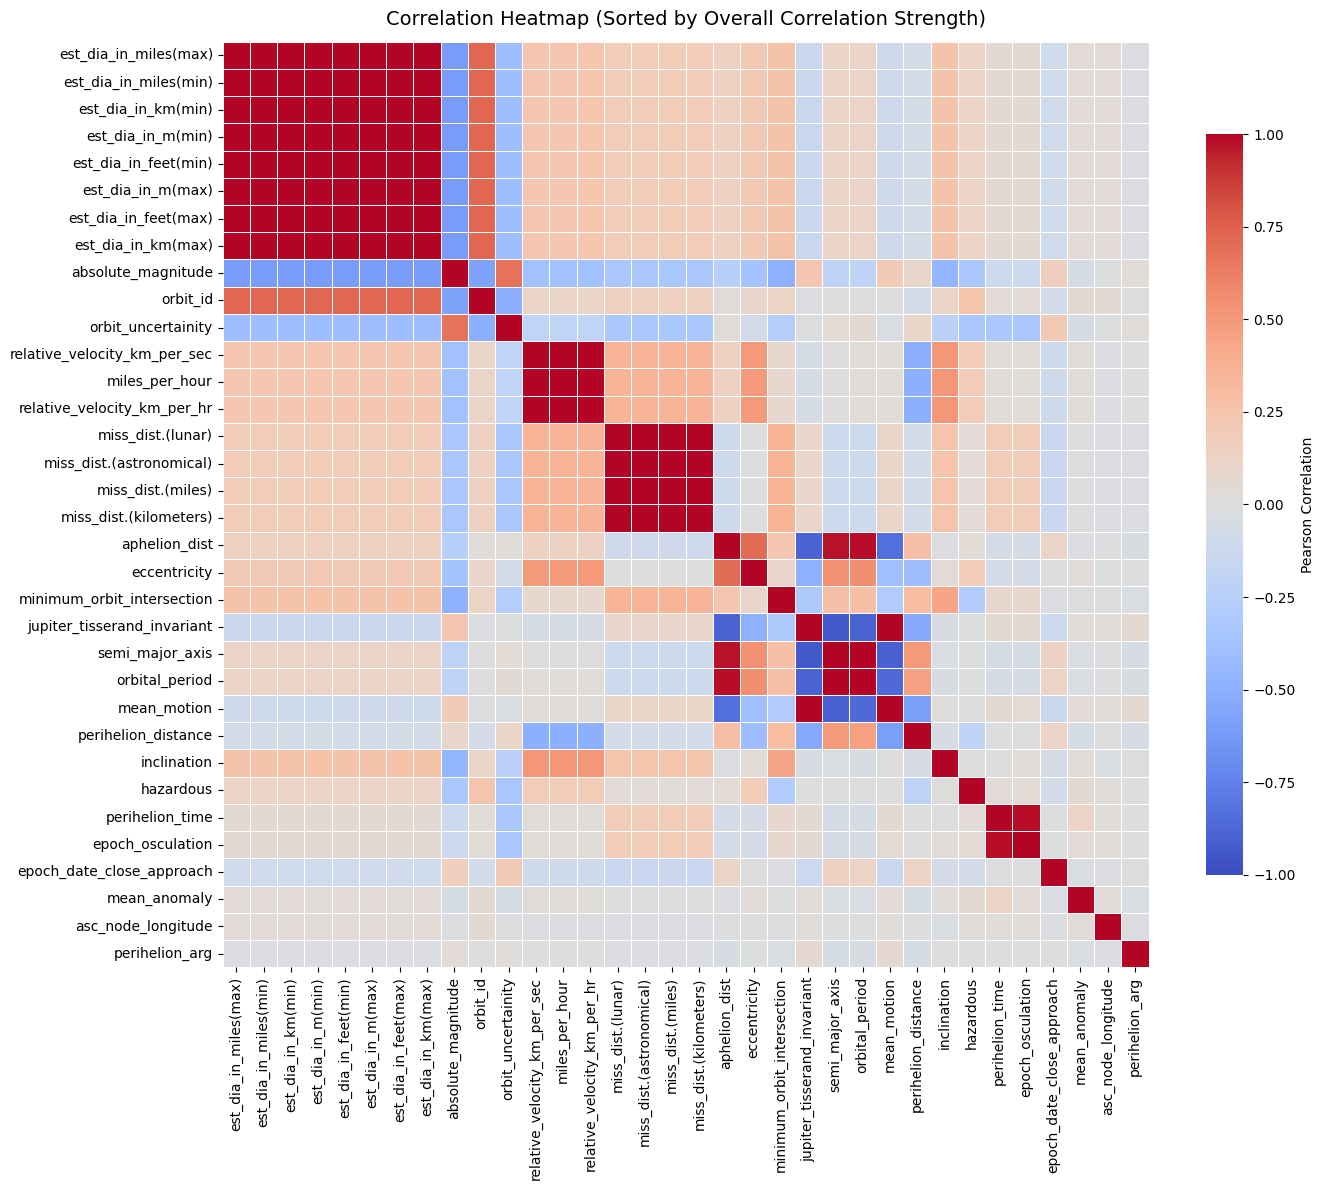

In [66]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_sorted,
    cmap='coolwarm',
    annot=False,          # set to True if you want correlation numbers displayed
    vmin=-1, vmax=1,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Pearson Correlation"}
)
plt.title('Correlation Heatmap (Sorted by Overall Correlation Strength)', fontsize=14, pad=12)
plt.tight_layout()
plt.show()


There are lots of multicollinear columns in the data. So, we should drop some of them and keep only once. Let's check which columns are multicollinear.

In [71]:
# Convert correlation matrix into a long-form table
corr_pairs = (
    corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # take upper triangle only
    .stack()
    .reset_index()
)
corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Sort by absolute correlation (descending)
corr_pairs['AbsCorrelation'] = corr_pairs['Correlation'].abs()
corr_pairs = corr_pairs.sort_values(by='AbsCorrelation', ascending=False)

corr_pairs


,Feature_1,Feature_2,Correlation,AbsCorrelation
38,est_dia_in_km(min),est_dia_in_feet(min),1.000000,1.000000
96,est_dia_in_m(min),est_dia_in_m(max),1.000000,1.000000
156,est_dia_in_miles(min),est_dia_in_feet(min),1.000000,1.000000
39,est_dia_in_km(min),est_dia_in_feet(max),1.000000,1.000000
33,est_dia_in_km(min),est_dia_in_km(max),1.000000,1.000000
210,est_dia_in_feet(min),est_dia_in_feet(max),1.000000,1.000000
126,est_dia_in_m(max),est_dia_in_miles(min),1.000000,1.000000
69,est_dia_in_km(max),est_dia_in_feet(min),1.000000,1.000000
66,est_dia_in_km(max),est_dia_in_m(max),1.000000,1.000000
37,est_dia_in_km(min),est_dia_in_miles(max),1.000000,1.000000


According to the results, we defined strongly multicollinear columns; we should keep only one column from the multicollinear groups. For example, keep est_dia_in_km(min) and est_dia_in_km(max) from the diameter/size/distance features and drop others. Keep relative_velocity_km_per_sec and remove other velocity features because they have strong correlations. With this way, we will keep only the necessary columns and will not have difficulties with multicollinearity. Also, it will decrease the model size increasing the performance and efficiency. 

In [72]:
# List of columns to drop based on multicollinearity analysis
columns_to_drop = [
    # Diameter / Size duplicates
    'est_dia_in_m(min)', 'est_dia_in_m(max)',
    'est_dia_in_miles(min)', 'est_dia_in_miles(max)',
    'est_dia_in_feet(min)', 'est_dia_in_feet(max)',
    
    # Velocity duplicates
    'relative_velocity_km_per_hr', 'miles_per_hour',
    
    # Miss distance duplicates
    'miss_dist.(astronomical)', 'miss_dist.(lunar)', 'miss_dist.(miles)',
    
    # Highly correlated orbit features
    'orbital_period', 'aphelion_dist', 'perihelion_time', 'jupiter_tisserand_invariant'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Optional: check remaining numerical columns
print("Remaining numeric columns:", df.select_dtypes(include=[np.number]).columns.tolist())


Remaining numeric columns: ['absolute_magnitude', 'est_dia_in_km(min)', 'est_dia_in_km(max)', 'epoch_date_close_approach', 'relative_velocity_km_per_sec', 'miss_dist.(kilometers)', 'orbit_id', 'orbit_uncertainity', 'minimum_orbit_intersection', 'epoch_osculation', 'eccentricity', 'semi_major_axis', 'inclination', 'asc_node_longitude', 'perihelion_distance', 'perihelion_arg', 'mean_anomaly', 'mean_motion', 'hazardous']


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


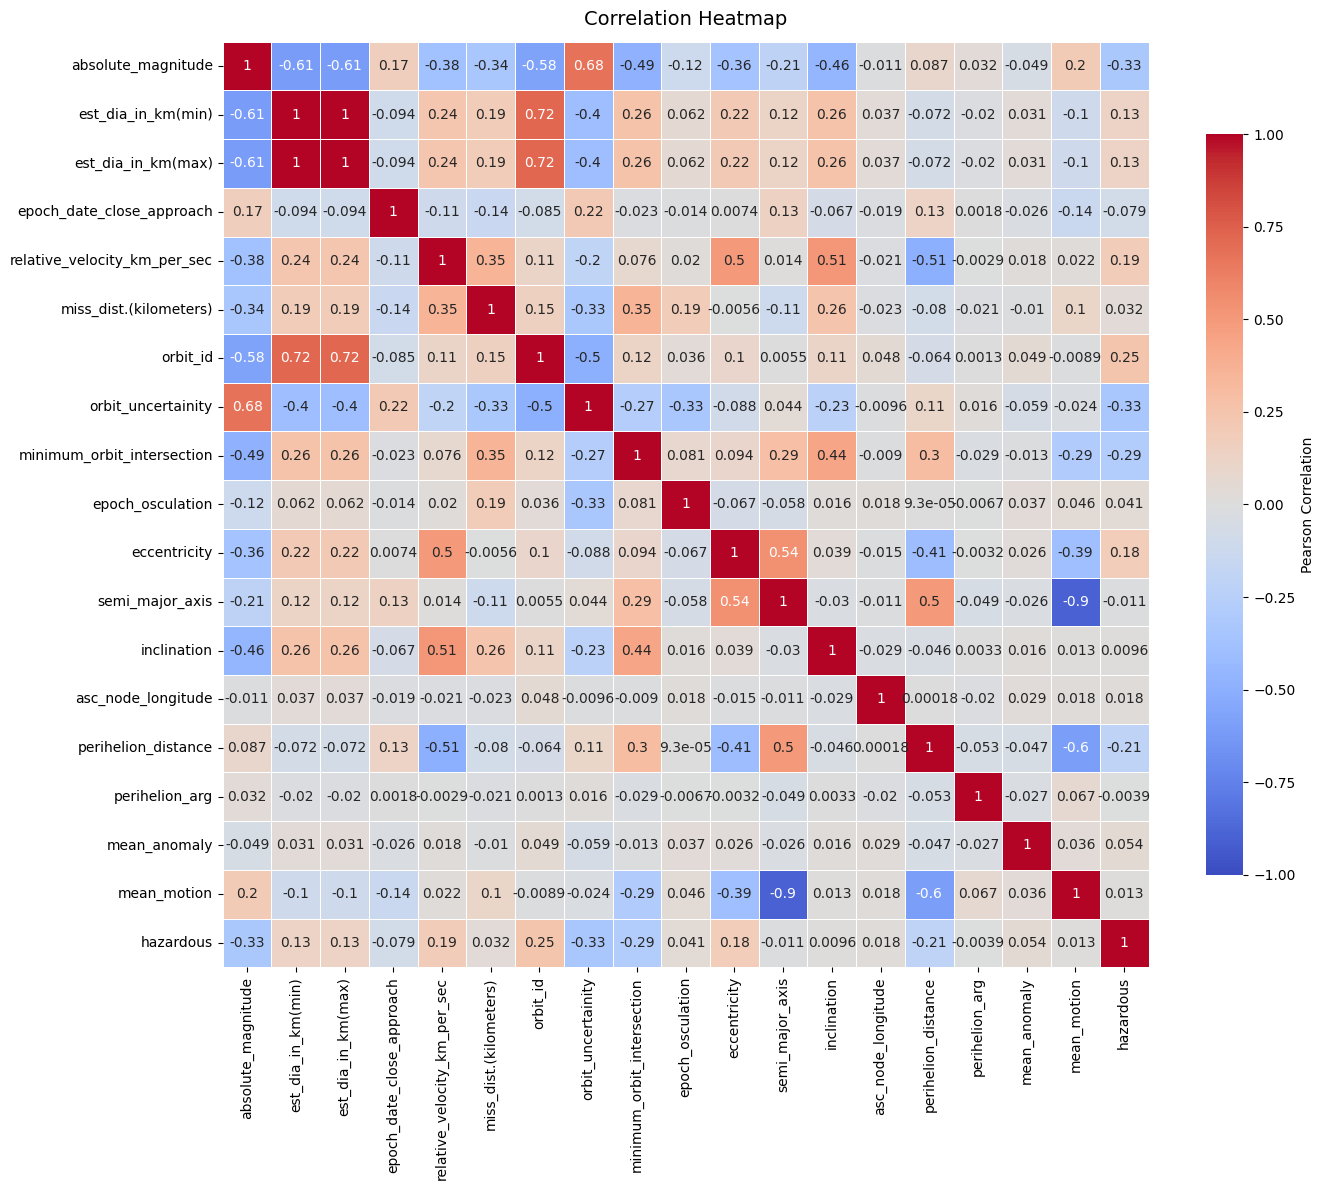

In [74]:
corr_ = df.corr(numeric_only=True, method='pearson')

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr_,
    cmap='coolwarm',
    annot=True,          # set to True if you want correlation numbers displayed
    vmin=-1, vmax=1,
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Pearson Correlation"}
)
plt.title('Correlation Heatmap', fontsize=14, pad=12)
plt.tight_layout()
plt.show()


In [75]:
# No need to scale the numerical features

## XGBoostClassifier with RandomizedSearch

In [76]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

In [101]:
# Prepare the data

from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=['hazardous'])
y = df['hazardous']


In [102]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [103]:
# Create the classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)


In [104]:
# Hyperparameter space
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

In [105]:
# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='roc_auc',  # good for imbalanced dataset
    verbose=2,
    n_jobs=-1,
    random_state=42
)

In [106]:
# Fit
random_search.fit(X_train, y_train)

# Evaluate
y_pred = random_search.predict(X_test)
y_proba = random_search.predict_proba(X_test)[:, 1]

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.05, max_depth=5, n_estimators=400, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=1.5, subsample=0.6; total time=   1.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.01, max_depth=7, n_estimators=400, reg_alpha=0.1, reg_lambda=1, subsample=0.7; total time=   0.9s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=2, subsample=0.6; total time=   0.4s
[CV] END colsample_bytree=0.6, gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=2, subsample=0.6; total time=   0.5s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=4, n_estimators=300, reg_alpha=0.01, reg_lambda=1.5, subsample=1.0; total time=   0.4s
[CV] END co

In [107]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       1.00      0.99      0.99       151

    accuracy                           1.00       938
   macro avg       1.00      0.99      1.00       938
weighted avg       1.00      1.00      1.00       938

ROC-AUC: 0.9999747553371425


In [108]:
# Best hyperparameters
print("Best hyperparameters:", random_search.best_params_)

Best hyperparameters: {'subsample': 0.9, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 0.7}


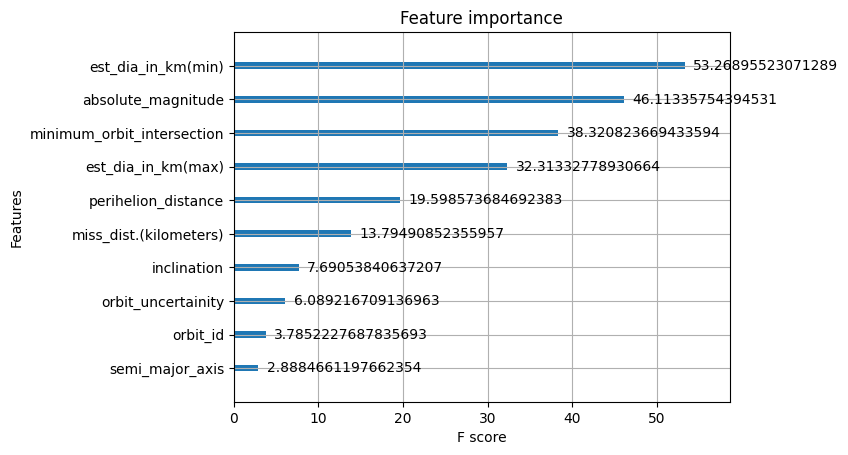


[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=7, n_estimators=300, reg_alpha=0, reg_lambda=2, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=400, reg_alpha=0.01, reg_lambda=2, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.05, max_depth=3, n_estimators=400, reg_alpha=0.1, reg_lambda=2, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=6, n_estimators=100, reg_alpha=0.01, reg_lambda=1, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.05, max_depth=7, n_estimators=400, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_d

In [109]:
from xgboost import plot_importance

best_model = random_search.best_estimator_
plot_importance(best_model, max_num_features=10, importance_type='gain')
plt.show()

## XGBoostClassifier and BayesianOptimization

In [91]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

In [92]:
def xgb_evaluate(max_depth, learning_rate, n_estimators, gamma, subsample, colsample_bytree, reg_alpha, reg_lambda):
    # Convert some float parameters to int
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    
    model = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
    
    # 5-fold CV
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    return score


In [93]:
xgb_bo = BayesianOptimization(
    f=xgb_evaluate,
    pbounds={
        'max_depth': (3, 10),
        'learning_rate': (0.01, 0.3),
        'n_estimators': (50, 500),
        'gamma': (0, 0.5),
        'subsample': (0.6, 1.0),
        'colsample_bytree': (0.6, 1.0),
        'reg_alpha': (0, 0.1),
        'reg_lambda': (0.8, 2.0)
    },
    random_state=42
)

In [94]:
# Number of initial random points + number of iterations
xgb_bo.maximize(init_points=10, n_iter=30)

# Print the best result
print("Best parameters:", xgb_bo.max['params'])
print("Best ROC-AUC:", xgb_bo.max['target'])

|   iter    |  target   | max_depth | learni... | n_esti... |   gamma   | subsample | colsam... | reg_alpha | reg_la... |
-------------------------------------------------------------------------------------------------------------------------
| 1         | 0.9997736 | 5.6217808 | 0.2857071 | 379.39727 | 0.2993292 | 0.6624074 | 0.6623978 | 0.0058083 | 1.8394113 |
| 2         | 0.9997841 | 7.2078050 | 0.2153410 | 59.263022 | 0.4849549 | 0.9329770 | 0.6849356 | 0.0181824 | 1.0200854 |
| 3         | 0.9998420 | 5.1296957 | 0.1621793 | 244.37525 | 0.1456145 | 0.8447411 | 0.6557975 | 0.0292144 | 1.2396342 |
| 4         | 0.9997920 | 6.1924898 | 0.2377010 | 139.85320 | 0.2571172 | 0.8369658 | 0.6185801 | 0.0607544 | 1.0046289 |
| 5         | 0.9997054 | 3.4553611 | 0.2851768 | 484.53441 | 0.4041986 | 0.7218455 | 0.6390688 | 0.0684233 | 1.3281829 |
| 6         | 0.9998787 | 3.8542676 | 0.1536013 | 65.474834 | 0.4546602 | 0.7035119 | 0.8650089 | 0.0311711 | 1.4240816 |
| 7         | 0.9998973 

In [95]:
best_params = xgb_bo.max['params']

final_model = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    gamma=best_params['gamma'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

final_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9579309401710595, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=0.3875664116805573, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06360779210240283,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=486, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [96]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Make predictions
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]  # predicted probabilities for ROC-AUC

# Classification metrics
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC:", roc_auc)

# Optional: confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       787
           1       1.00      0.98      0.99       151

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938

ROC-AUC: 0.9999831702247616
Confusion Matrix:
 [[787   0]
 [  3 148]]


<Figure size 1000x800 with 0 Axes>

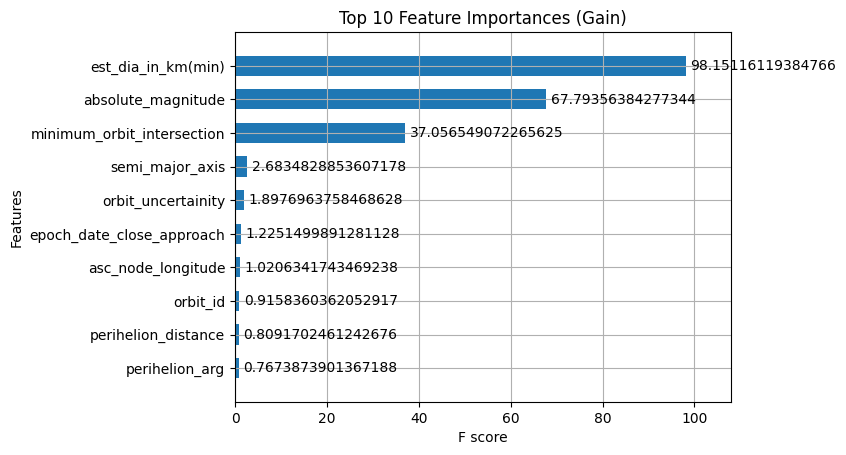

In [97]:
# Plot top 10 most important features
plt.figure(figsize=(10, 8))
plot_importance(final_model, max_num_features=10, importance_type='gain', height=0.6)
plt.title("Top 10 Feature Importances (Gain)")
plt.show()